Rebuilding the Dupuis+ spot model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
import lightkurve as lk
import matplotlib.gridspec as gridspec

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [19]:
def spot(d, gamma, phi, U =1, kw=0):
    eps0 = partial_coverage(d, phi, gamma) 
    c = U*(1-(1-kw)*eps0)
    return c

def coverage(d, phi, gamma):
    k = np.sin(gamma)
    z0 = get_z0(phi)
    if  d <= (1 - k**2):
        eps = k**2*z0
    elif  d > (1 - k**2):
        s = (1 - k**2)/d 
        v = (d - s) / (k*z0)
        eps = (1/np.pi) *( np.arccos(s) - (s*(1-s**2)**0.5) + ( (k**2) * z0*(np.arccos(v) - (v*(1-v**2)**0.5))))
    else:
        eps =1
    return eps

def get_z0(phi, beta = 0.0, i =90, lam=180):
    z0 = np.cos(lam - phi) * np.cos(beta) * np.sin(i) + np.sin(beta) * np.cos(i)
    return z0



/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in arccos
  # This is added back by InteractiveShellApp.init_path()
/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


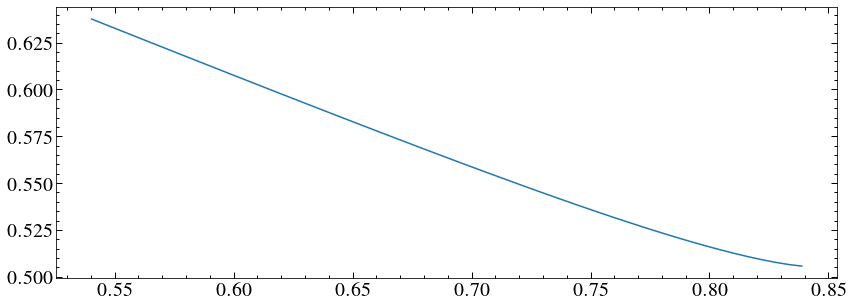

In [27]:
phi = np.linspace(0, 1, 100)
ds = [np.cos(p) for p in phi]
counts = [spot(d, 48.61, p) for d, p in zip(ds, phi)]
plt.plot(ds, counts)

In [28]:
ds

[1.0,
 0.9999489852312267,
 0.9997959461299198,
 0.9995408983105885,
 0.9991838677956433,
 0.9987248910127429,
 0.9981640147910761,
 0.9975012963565844,
 0.9967368033261231,
 0.9958706137005628,
 0.9949028158568303,
 0.993833508538892,
 0.992662800847679,
 0.9913908122299557,
 0.9900176724661326,
 0.9885435216570246,
 0.9869685102095573,
 0.9852927988214202,
 0.9835165584646711,
 0.9816399703682924,
 0.9796632259996998,
 0.9775865270452068,
 0.9754100853894475,
 0.9731341230937576,
 0.9707588723735174,
 0.9682845755744598,
 0.9657114851479426,
 0.9630398636251922,
 0.9602699835905172,
 0.9574021276534964,
 0.9544365884201449,
 0.9513736684630593,
 0.9482136802905462,
 0.9449569463147377,
 0.941603798818695,
 0.9381545799225068,
 0.9346096415483818,
 0.9309693453847429,
 0.9272340628493242,
 0.9234041750512755,
 0.9194800727522776,
 0.9154621563266734,
 0.9113508357206177,
 0.9071465304102505,
 0.9028496693588987,
 0.8984606909733078,
 0.8939800430589131,
 0.8894081827741491,
 0.8847455